In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

#### Q12.

This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?
> This is possible when $\sum_{i=1}^{n}  x_{i}=\sum_{i=1}^{n}y_{i} \Rightarrow \hat{\beta}=1$. In other words, when y=x is the straight line relationship, the order of regression doesn't matter. 

(b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X. 

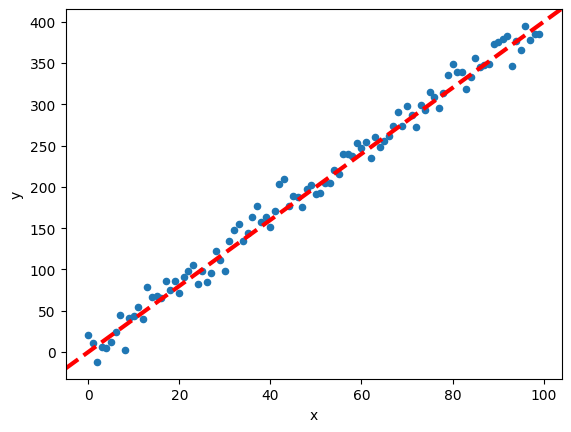

In [2]:
# this is the same as having a straight line with slope not equal to 1, y = mx + Ɛ

noise = np.random.normal(loc=5,scale=14,size=100)
values = np.array([x for x in np.arange(0,100)])
slope = 4
y = slope*values + noise

data1 = pd.DataFrame({'x':values,'y':y})

ax = data1.plot.scatter('x','y')
ax.axline(xy1=(0,0), slope=4, linewidth=3, linestyle='dashed', color='r');

In [3]:
# regressing Y onto X
design1 = MS(['x'])
X_1 = design1.fit_transform(data1)
y_1 = data1['y']

model1 = sm.OLS(y_1,X_1)
results1 = model1.fit()
beta_1 = summarize(results1).iloc[1,0]

# regressing X onto Y 
design2 = MS(['y'])
y_2 = design2.fit_transform(data1)
X_2 = data1['x']

model2 = sm.OLS(X_2,y_2)
results2 = model2.fit()
beta_2 = summarize(results2).iloc[1,0]

if round(beta_1,1) != round(beta_2,1):
    print("The regression coefficients are not equal")

The regression coefficients are not equal


(c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

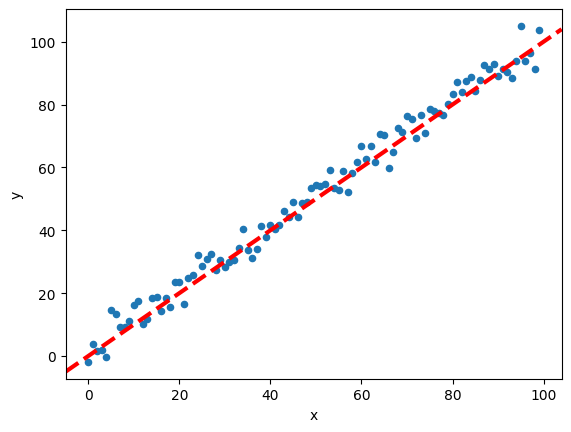

In [4]:
# this is the same as having a straight line with slope 1, y=x

noise = np.random.normal(loc=2,scale=4,size=100)
values = np.array([x for x in np.arange(0,100)])
slope = 1
y = slope*values+noise

data2 = pd.DataFrame({'x':values,'y':y})

ax = data2.plot.scatter('x','y')
ax.axline(xy1=(0,0), slope=1, linewidth=3, linestyle='dashed', color='r');

In [5]:
# regressing Y onto X
design3 = MS(['x'])
X_3 = design3.fit_transform(data2)
y_3 = data2['y']

model3 = sm.OLS(y_3,X_3)
results3 = model3.fit()
beta_3 = summarize(results3).iloc[1,0]

# regressing X onto Y 
design4 = MS(['y'])
y_4 = design4.fit_transform(data2)
X_4 = data2['x']

model4 = sm.OLS(X_4,y_4)
results4 = model4.fit()
beta_4 = summarize(results4).iloc[1,0]

if round(beta_3,1) == round(beta_4,1):
    print("The regression coefficients are equal")

The regression coefficients are equal


#### Q14
This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:

In [6]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?
>- $\hat{y} = \beta_{0} + \beta_{1} \cdot \textcolor{blue}{x_{1}} + \beta_{2} \cdot \textcolor{blue}{x_{2}} + \epsilon$
>- The coefficients are $\beta_{0}=2, \beta_{1}=2, \beta_{2}=0.3$.

(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

The correlation b/w x1 and x2 is 0.772324497691354


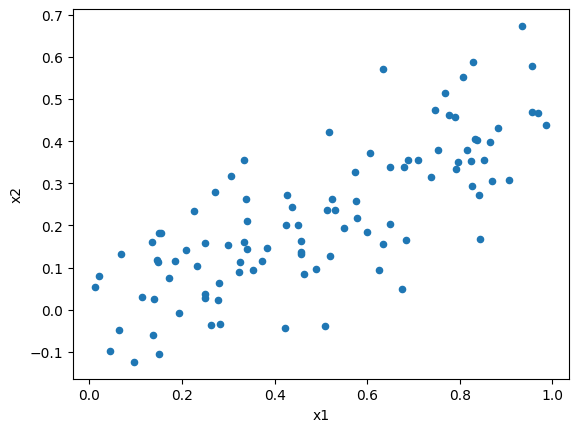

In [7]:
data = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
print("The correlation b/w x1 and x2 is {0}".format(np.corrcoef(x1,x2)[0][1]))
data.plot.scatter('x1','x2',marker='o');

(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat{\beta_{0}}, \hat{\beta_{1}}, \hat{\beta_{2}}$? How do these relate to the true $\hat{\beta_{0}}, \hat{\beta_{1}}, \hat{\beta_{2}}$? Can you reject the null hypothesis $H_{0} : \beta_{0}=0$? How about the null
hypothesis $H_{0} : \beta_{2}=0$?

In [8]:
# Fitting model c 
X_c = MS(['x1', 'x2']).fit_transform(data[['x1', 'x2']])
y = data['y']
model_c = sm.OLS(y, X_c)
results_c = model_c.fit()
summarize(results_c)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


>- The value of $\beta_{0}$ is close to the true value while the other 2 coefficients are off.
>- The p value of $\beta_{0}$ is small, hence the null hypothesis can be rejected.
>- The p value of $\beta_{2}$ is large, hence the null hypothesis cannot be rejected. 

(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $H_{1} : \beta_{0}=0$?

In [9]:
# Fitting model d 
X_d = MS(['x1']).fit_transform(data[['x1']])
model_d = sm.OLS(y, X_d)
results_d = model_d.fit()
summarize(results_d)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


> The null hypothesis can be rejected since the p value is small. 

(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis $H_{1} : \beta_{0}=0$?

In [10]:
# Fitting model e
X_e = MS(['x2']).fit_transform(data[['x2']])
model_e = sm.OLS(y, X_e)
results_e = model_e.fit()
summarize(results_e)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


> The null hypothesis can be rejected since the p value is small. 

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.
>- Yes. The result in (c) means that we can't reject the null hypothesis for $\beta_{1}$. However from (d) and (e) we can reject the null hypothesis for $\beta_{1}$.
>- This is because x1 and x2 are linearly dependent (and with high correlation). This means that adding both variables to one model results in redundancies and weaker estimates for either coefficient. However, when done independently the least squares model is able to converge on an estimate for the coefficients.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

In [11]:
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [12]:
# Fitting model c with new points 
data_new = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
X_c_new = MS(['x1', 'x2']).fit_transform(data_new[['x1', 'x2']])
y = data_new['y']
model_c_new = sm.OLS(y, X_c_new)
results_c_new = model_c_new.fit()
summarize(results_c_new)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [13]:
# Fitting model d with new points 
X_d_new = MS(['x1']).fit_transform(data_new[['x1']])
model_d_new = sm.OLS(y, X_d_new)
results_d_new = model_d_new.fit()
summarize(results_d_new)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [14]:
# Fitting model e with new points 
X_e_new = MS(['x2']).fit_transform(data_new[['x2']])
model_e_new = sm.OLS(y, X_e_new)
results_e_new = model_e_new.fit()
summarize(results_e_new)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


>- For model c, adding the outlier has worsened the estimate for $\beta_{1}$ and improved the estimate for $\beta_{2}$, which can be seen from the p values.
>- For models d and e, while the p value remains unchanged but the estimates for $\beta_{1}$ have worsened. 

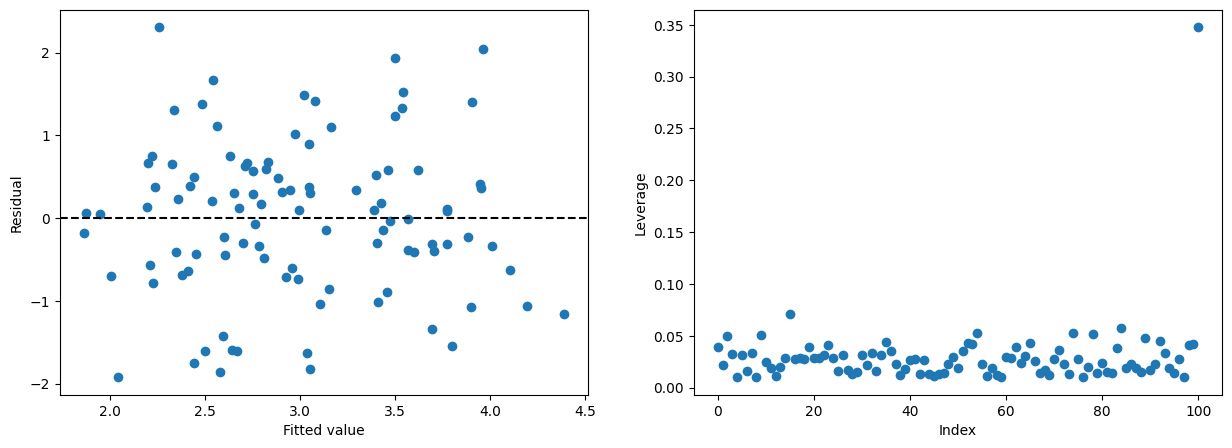

In [15]:
# Model c
fig, ax = subplots(nrows=1,ncols=2,figsize=(15,5))

# Analysis of residuals  & outliers 
ax[0].scatter(results_c_new.fittedvalues, results_c_new.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='k', ls='--');

# Analysis of leverage
infl = results_c_new.get_influence()
ax[1].scatter(np.arange(X_c_new.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

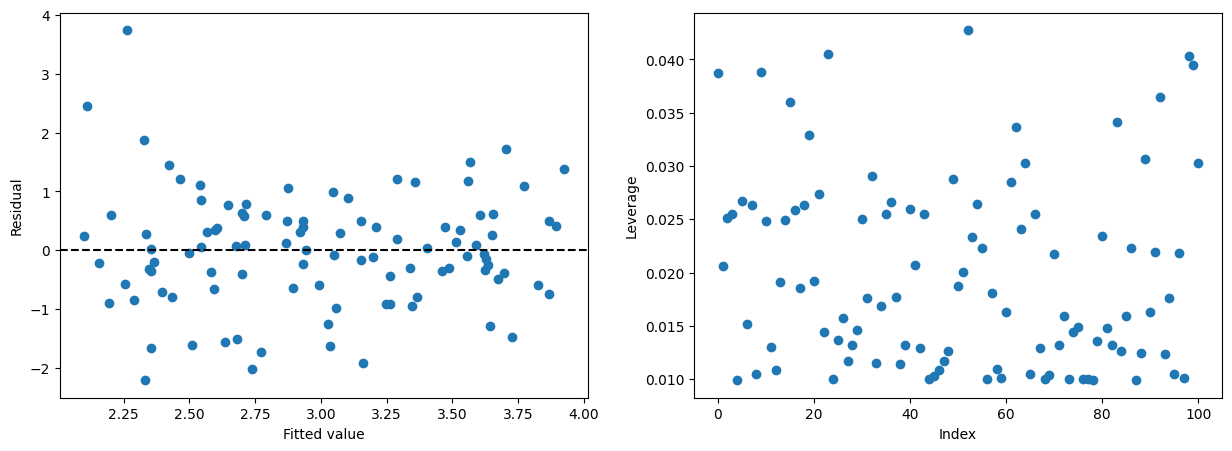

In [16]:
# Model d 
fig, ax = subplots(nrows=1,ncols=2,figsize=(15,5))

# Analysis of residuals  & outliers 
ax[0].scatter(results_d_new.fittedvalues, results_d_new.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='k', ls='--');

# Analysis of leverage
infl = results_d_new.get_influence()
ax[1].scatter(np.arange(X_d_new.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

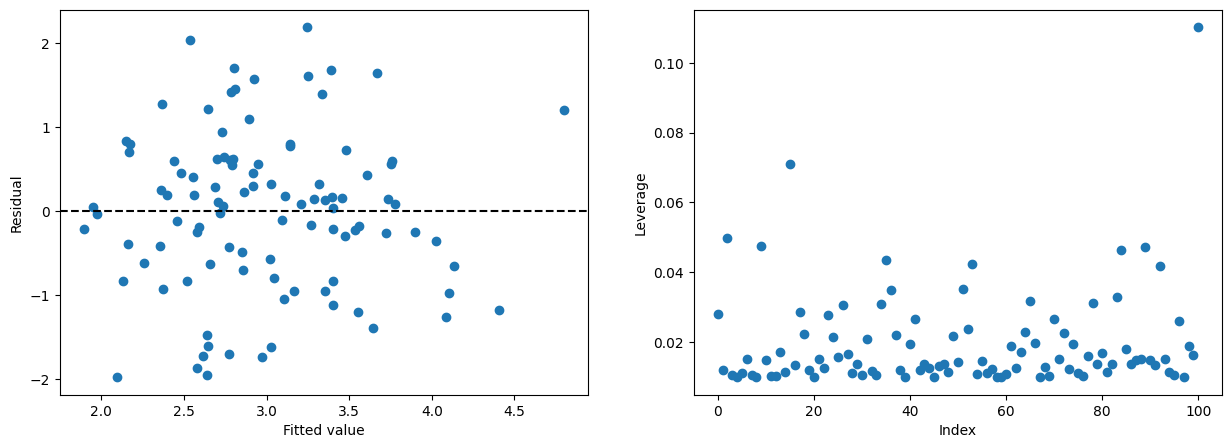

In [17]:
# Model e
fig, ax = subplots(nrows=1,ncols=2,figsize=(15,5))

# Analysis of residuals  & outliers  
ax[0].scatter(results_e_new.fittedvalues, results_e_new.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='k', ls='--');

# Analysis of leverage
infl = results_e_new.get_influence()
ax[1].scatter(np.arange(X_e_new.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

>- For model c the anomaly is almost an outlier and it has very high leverage.
>- For model d the anomaly is an outlier but it does not have high leverage.
>- For model e the anomaly is not an outlier but has high leverage.